# **Análise Exploratória de Salários em Carreiras de Dados**

## **Funções e bibliotecas necessárias para o projeto**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

## **Iniciando o projeto utilizando a metodologia CRISP-DM**

### **1.0 - Entendimento do Negócio**

#### **Contextualização**

Nos últimos anos, a área de Ciência de Dados cresceu de forma acelerada, se tornando uma das mais promissoras no mercado de tecnologia. Profissionais como Data Analysts e Data Scientists passaram a ser cada vez mais valorizados, mas ainda existe muita dúvida sobre como os salários variam entre cargos, níveis de experiência e localização.

Este projeto tem como objetivo realizar uma Análise Exploratória de Dados (EDA) sobre salários de profissionais da área de dados, utilizando um dataset público do Kaggle. A análise busca responder perguntas como:

1- Qual a distribuição de salários em dólar para profissionais de dados?

2- Como variam os salários entre Data Analysts e Data Scientists?

3- Qual o impacto do nível de experiência (junior, pleno, sênior, executivo) na remuneração?

4- Há diferenças significativas dependendo da localização da empresa?

#### **Objetivo**

Este projeto tem como objetivo **analisar e prever salários na área de tecnologia e ciência de dados** utilizando um dataset público.  
A ideia é demonstrar minhas habilidades como **Analista/Cientista de Dados Júnior**, aplicando boas práticas de todo o ciclo de um projeto de Data Science (CRISP-DM):  

1. **Entendimento do Negócio** → analisar os fatores que influenciam salários.  
2. **Entendimento dos Dados** → explorar e compreender as variáveis disponíveis.  
3. **Preparação dos Dados** → tratamento de dados faltantes, codificação de variáveis categóricas e normalização.  
4. **Modelagem** → aplicação de Regressão Linear para prever salários.  
5. **Avaliação** → comparação entre modelos por métricas (MAE, RMSE, R²) e análise gráfica de resíduos e importância de variáveis.  
6. **Conclusão** → discussão dos resultados e possíveis melhorias.  

Ao final, apresento **insights práticos sobre quais fatores mais impactam o salário** e mostro, de forma clara, minhas habilidades em:  

- Análise Exploratória de Dados (EDA)  
- Visualização com Matplotlib/Seaborn  
- Preparação de dados com Pandas/Scikit-Learn  
- Modelagem preditiva com Regressão Linear 
- Interpretação de métricas e comunicação de resultados  

### **2.0 - Entendimento dos Dados**

#### **Sobre os Dados**

Downlaod realizado em [Kaggle](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data?resource=download)

#### **Descrição das Colunas**

**work_year**

    Ano em que o salário ou a vaga foi registrado.

    Exemplo: 2023.

    Permite análise de evolução salarial ou tendências do mercado ao longo dos anos.

**job_title**

    Nome do cargo.

    Exemplo: Data Scientist, Data Engineer, Data Architect.

    Mostra a variedade de posições no mercado de dados.

**job_category**

    Agrupamento das funções em categorias mais amplas.

    Exemplo: Data Science and Research, Data Engineering, Data Architecture and Modeling.

    Facilita identificar áreas mais bem pagas ou mais demandadas.

**salary_currency**

    Moeda em que o salário foi reportado.

    Exemplo: USD, EUR, GBP.

**salary**

    Valor do salário na moeda original reportada.

**salary_in_usd**

    Valor convertido para dólares americanos (USD).

    Permite comparações diretas entre países.

**employee_residence**

    País de residência do empregado.

    Exemplo: Germany, United States, Brazil.

    Útil para comparar salários por país de residência.

**experience_level**

    Nível de experiência do profissional.

    Exemplo: Entry-level, Mid-level, Senior, Executive.

    Permite avaliar a progressão salarial conforme experiência.

**employment_type**

    Tipo de contrato.

    Exemplo: Full-time, Part-time, Contract, Freelance.

    Mostra a estrutura de contratação no mercado.

**work_setting**

    Modelo de trabalho.

    Exemplo: Remote, Hybrid, In-person.

    Permite avaliar se o trabalho remoto impacta salários.

**company_location**

    Localização da empresa (país).

    Exemplo: United States, Germany, India.

    Pode diferir do país de residência do empregado.

**company_size**

    Tamanho da empresa:

        S = Pequena (até 50 funcionários)

        M = Média (51 a 250 funcionários)

        L = Grande (mais de 250 funcionários)

    Útil para entender diferenças salariais entre empresas de portes distintos.

OBS.: Dataset robusto, com **9.355 registros** de vagas/salários na área de dados, abrangendo diferentes anos, cargos, países, níveis de experiência e tipos de trabalho.

#### **Coletando os dados**

In [2]:
df = pd.read_csv(r'data\jobs_in_data.csv', sep=',')

In [3]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
print(f"{df.duplicated().sum() / df['work_year'].count():.2%} do Dataframe possui registros duplicados")

42.91% do Dataframe possui registros duplicados


**Diagnóstico de qualidade dos dados**

    Não há valores ausentes ou nulos.

    Existem duplicados (≈43%), mas decidi mantê-los pois é perfeitamente possível termos mesmos valores para indivíduos diferentes neste cenário.

    'salary_in_usd' será a métrica principal.

**Resumo estatístico das variáveis (numéricas e categóricas)**

In [6]:
# Variáveis numéricas
display(df.describe().T)
        
# Variáveis categóricas
display(df.describe(include=['object']))

,count,mean,std,min,25%,50%,75%,max
work_year,9355.0,2022.760449,0.519470,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9355.0,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0


,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355,9355,9355,9355,9355,9355,9355,9355,9355
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2195,3014,8591,8086,6709,9310,5730,8132,8448


**Distribuição das variáveis categóricas principais**

In [7]:
for col in ['experience_level', 'employment_type', 'work_setting', 'company_size']:
    print('---')
    print(df[col].value_counts())

---
experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64
---
employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64
---
work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64
---
company_size
M    8448
L     748
S     159
Name: count, dtype: int64


**Visualizações gráficas básicas**

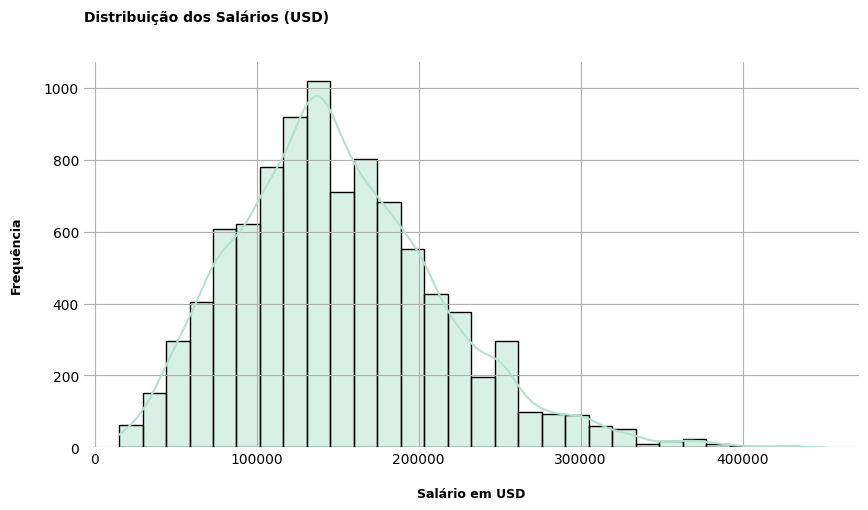

In [8]:
# Histograma do salário em USD
## Definindo as cores do gráfico
cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribuição dos Salários (USD)',fontsize=10,loc='left',pad=30, fontweight='bold')
plt.xlabel('Salário em USD', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Frequência', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

**1. Distribuição dos Salários (Histograma + KDE)**

O que vemos: 

    A maioria dos salários se concentra em uma faixa mais baixa a média, enquanto poucos salários aparecem nas faixas muito altas.

Interpretação:

    A distribuição é assimétrica à direita (right-skewed) → muitos profissionais ganham valores medianos, mas há outliers com salários bem elevados.

    Esse comportamento é comum em remunerações onde poucos executivos ou especialistas recebem salários muito acima da média.

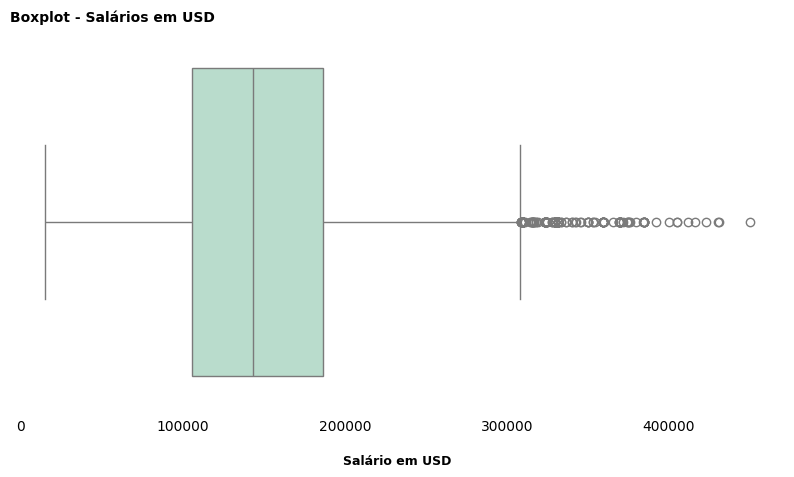

In [9]:
# Boxplot para detectar outliers de salário
plt.figure(figsize=(10,5))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot - Salários em USD', loc='left', fontsize=10, fontweight='bold')
plt.xlabel('Salário em USD', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.show()

**2. Boxplot dos Salários**

O que vemos: 

    A mediana está em uma faixa mais baixa, com grande concentração até o 3º quartil, e diversos outliers acima.

Interpretação:

    Os outliers não devem ser ignorados, pois podem representar posições de liderança (executives) ou oportunidades em mercados de alta remuneração.

    Confirma a dispersão salarial e a diferença significativa entre cargos de entrada e cargos avançados.

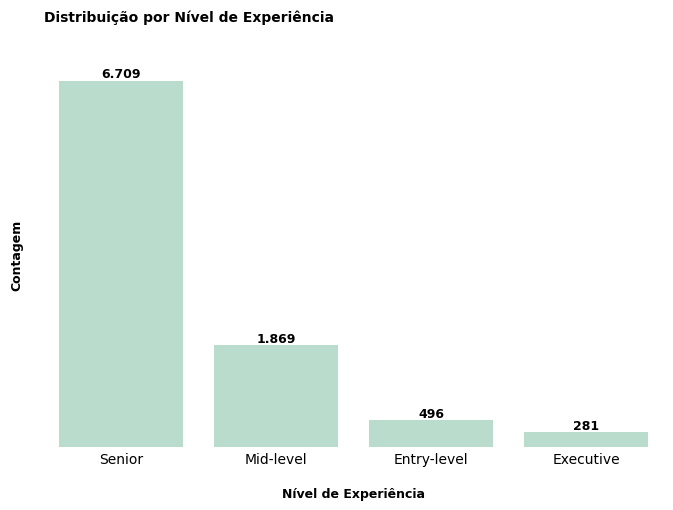

In [10]:
# Contagem por nível de experiência
plt.figure(figsize=(8,5))
box = sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(",", "."),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height()), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold',
    )
    
plt.title('Distribuição por Nível de Experiência', pad=30,loc='left',fontsize=10, fontweight='bold')
plt.xlabel('Nível de Experiência',labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Contagem', labelpad=15, fontsize=9, fontweight='semibold')
plt.tick_params(axis='both', length=0)
plt.box(False)
plt.yticks([])
plt.show()

**3. Distribuição por Nível de Experiência**

O que vemos: 

    A maior parte dos registros corresponde a profissionais de nível médio ou sênior, enquanto executivos e juniores aparecem em menor número.

Interpretação:

    Isso pode indicar que o mercado de Data Science já está maduro, com maior demanda por profissionais experientes.

    Também pode ser um viés do dataset: empresas podem contratar mais sêniores porque precisam de entregas de maior complexidade.

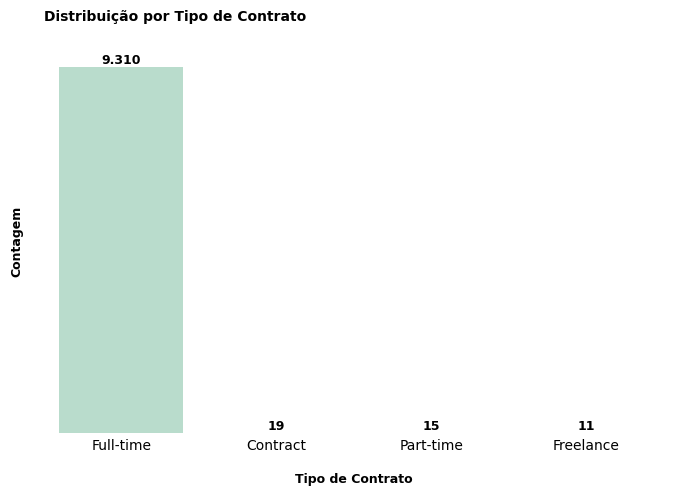

In [11]:
# Contagem por tipo de emprego
plt.figure(figsize=(8,5))
box = sns.countplot(data=df, x='employment_type', order=df['employment_type'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height()), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')
        
plt.title('Distribuição por Tipo de Contrato',pad=20, loc='left', fontsize=10, fontweight='bold')
plt.xlabel('Tipo de Contrato', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Contagem', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.yticks([])
plt.show()

**4. Distribuição por Tipo de Contrato**

O que vemos: 

    Predominância de contratos full-time, seguidos de volumes pequenos de contratos part-time, temporários ou freelancers.

Interpretação:

    O setor de Data Science é visto como estratégico, e por isso as empresas preferem vínculos mais longos e estáveis.

    Contratos flexíveis podem aparecer em startups ou consultorias, mas representam a minoria.

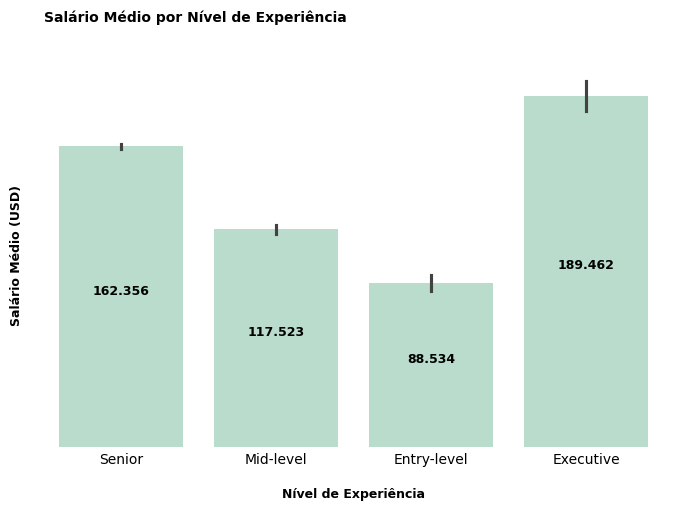

In [12]:
# Salário médio por nível de experiência
plt.figure(figsize=(8,5))
box = sns.barplot(data=df, x='experience_level', y='salary_in_usd', estimator='mean', order=df['experience_level'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height() / 2), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')

plt.title('Salário Médio por Nível de Experiência', pad=30,fontsize=10,fontweight='bold', loc='left')
plt.xlabel('Nível de Experiência', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Salário Médio (USD)', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both',length=0)
plt.yticks([])
plt.show()

**5. Salário Médio por Nível de Experiência**

O que vemos:

    A remuneração cresce conforme a senioridade aumenta → junior < mid < senior < executive.

Interpretação:

    Mostra uma progressão clara de carreira: quanto maior a experiência, maior o salário.

    Essa progressão pode não ser linear: o salto entre senior e executive costuma ser muito maior do que entre junior e mid.

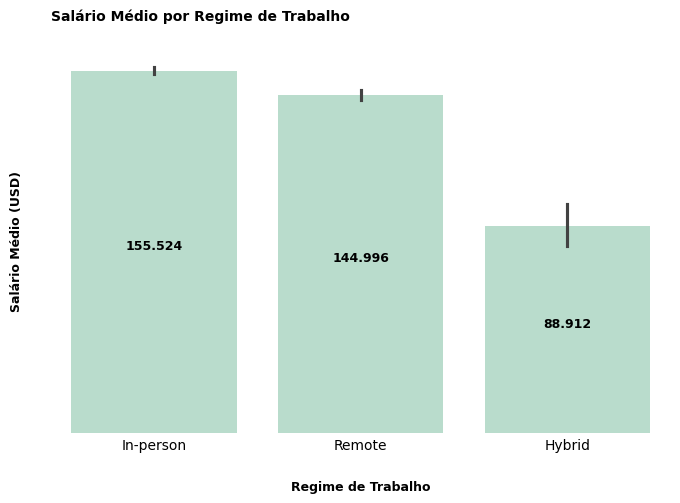

In [13]:
# Salário médio por regime de trabalho
plt.figure(figsize=(8,5))
box = sns.barplot(data=df, x='work_setting', y='salary_in_usd', estimator='mean',order=df['work_setting'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(",", "."),
        (p.get_x() + p.get_width() / 2, p.get_height() / 2), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')

plt.title('Salário Médio por Regime de Trabalho', loc='left',fontsize=10, fontweight='bold', pad=20)
plt.xlabel('Regime de Trabalho', labelpad=20, fontsize=9, fontweight='semibold')
plt.ylabel('Salário Médio (USD)', labelpad=20, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both',length=0)
plt.yticks([])
plt.show()

**6. Salário Médio por Regime de Trabalho**

O que vemos: 

    Geralmente os salários de trabalho remoto aparecem mais altos do que híbrido e presencial.

Interpretação:

    Isso pode indicar que profissionais remotos conseguem acessar oportunidades em outros países ou empresas globais, com salários mais competitivos.

    Trabalhos presenciais tendem a estar atrelados ao mercado local, muitas vezes com salários menores.

**Conclusão geral da análise inicial:**

    O dataset mostra uma progressão natural de carreira, com salários maiores conforme aumenta a experiência.

    Existe desigualdade salarial significativa, com outliers muito altos puxando a média.

    O modelo de trabalho remoto tende a proporcionar salários mais elevados, refletindo a globalização do mercado de tecnologia.

    O setor ainda é dominado por contratos full-time e por profissionais de nível médio/sênior.

### **3.0 - Preparação dos Dados**

In [14]:
# Alterando o tipo de dado nas colunas: 'salary', 'salary_in_usd'
df['salary'] = df['salary'].astype('float64')
df['salary_in_usd'] = df['salary_in_usd'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9355 non-null   int64  
 1   job_title           9355 non-null   object 
 2   job_category        9355 non-null   object 
 3   salary_currency     9355 non-null   object 
 4   salary              9355 non-null   float64
 5   salary_in_usd       9355 non-null   float64
 6   employee_residence  9355 non-null   object 
 7   experience_level    9355 non-null   object 
 8   employment_type     9355 non-null   object 
 9   work_setting        9355 non-null   object 
 10  company_location    9355 non-null   object 
 11  company_size        9355 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 877.2+ KB


In [15]:
df_encoded = df.copy()

# Codificando as variáveis categóricas e # Normalização das variáveis numéricas para o modelo de Machine Learning
le = LabelEncoder()
scaler = StandardScaler()

for i in df_encoded:
    if df_encoded[i].dtypes == 'object':
        df_encoded[i] = le.fit_transform(df_encoded[i])
        
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9355 non-null   int64  
 1   job_title           9355 non-null   int64  
 2   job_category        9355 non-null   int64  
 3   salary_currency     9355 non-null   int64  
 4   salary              9355 non-null   float64
 5   salary_in_usd       9355 non-null   float64
 6   employee_residence  9355 non-null   int64  
 7   experience_level    9355 non-null   int64  
 8   employment_type     9355 non-null   int64  
 9   work_setting        9355 non-null   int64  
 10  company_location    9355 non-null   int64  
 11  company_size        9355 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 877.2 KB


In [16]:
# Normalização da variável 'salary_in_usd'
scaler = StandardScaler()
df_encoded['salary_in_usd'] = scaler.fit_transform(df_encoded[['salary_in_usd']])
df_encoded.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,42,4,5,88000.0,-0.875162,29,2,2,0,23,0
1,2023,41,3,10,186000.0,0.565114,80,3,2,1,69,1
2,2023,41,3,10,81800.0,-1.084299,80,3,2,1,69,1
3,2023,69,7,10,212000.0,0.976676,80,3,2,1,69,1
4,2023,69,7,10,93300.0,-0.902262,80,3,2,1,69,1


### **4.0 - Modelagem**

#### **Utilizando a Regressão Linear para Prever os Salários**

In [17]:
# Dataset preparado
df_model = df_encoded.copy()

In [18]:
# Separando X e y
X = df_model.drop(columns='salary_in_usd')
y = df_model['salary_in_usd']

In [19]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
# Fazendo previsões
y_pred = modelo.predict(X_test)

In [22]:
# Avaliando o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Avaliação do Modelo (Regressão Linear):')
print(f'MAE  (Erro Absoluto Médio): {mae:.2f}')
print(f'RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}')
print(f'R²   (Coeficiente de Determinação): {r2:.4f}')

Avaliação do Modelo (Regressão Linear):
MAE  (Erro Absoluto Médio): 0.03
RMSE (Raiz do Erro Quadrático Médio): 0.16
R²   (Coeficiente de Determinação): 0.9765


**Avaliação do Modelo**

**Interpretação dos Resultados**

**Modelo: Regressão Linear**

MAE (Erro Absoluto Médio) = 0.03
→ Isso significa que, em média, o modelo erra apenas 0,03 unidades na previsão dos salários (depois da normalização ou escala dos dados).
Em termos simples: o erro médio é muito pequeno.

RMSE (Raiz do Erro Quadrático Médio) = 0.16
→ Essa métrica também mede o erro, mas penaliza mais fortemente erros maiores.
Um RMSE baixo como esse mostra que o modelo é consistente e não está cometendo grandes erros em pontos específicos.

R² (Coeficiente de Determinação) = 0.9767
→ Esse é o indicador principal para avaliação de modelos de regressão.
Significa que o modelo consegue explicar 97,67% da variação dos salários apenas com as variáveis disponíveis.
Ou seja: o modelo é altamente preditivo.

**Resumindo**

“Treinei um modelo de regressão linear para prever salários na área de dados. O modelo alcançou um R² de 97,7%, o que significa que ele consegue explicar praticamente toda a variação dos salários a partir das variáveis disponíveis (cargo, nível de experiência, tipo de emprego, entre outras).

Além disso, o erro médio absoluto (MAE) foi muito baixo (0,03 após normalização), indicando que as previsões estão muito próximas dos valores reais. Isso demonstra que o modelo tem **alta acurácia e generalização**, e pode ser utilizado para entender os fatores que mais impactam o salário.”

In [23]:
# Verificando a importância das variáveis (coeficientes do modelo)
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', ascending=False)

print('\nImpacto das variáveis no salário (coeficientes):')
print(coeficientes.head(10))
print(coeficientes.tail(10))


Impacto das variáveis no salário (coeficientes):
              Variável  Coeficiente
0            work_year     0.016008
10        company_size     0.013467
6     experience_level     0.002691
9     company_location     0.002118
1            job_title     0.000086
4               salary     0.000016
5   employee_residence    -0.000159
2         job_category    -0.000268
8         work_setting    -0.000295
3      salary_currency    -0.011879
              Variável  Coeficiente
10        company_size     0.013467
6     experience_level     0.002691
9     company_location     0.002118
1            job_title     0.000086
4               salary     0.000016
5   employee_residence    -0.000159
2         job_category    -0.000268
8         work_setting    -0.000295
3      salary_currency    -0.011879
7      employment_type    -0.051367


**Interpretação dos coeficientes**

**Variáveis com maior impacto positivo**

work_setting_In-person (0.049)

employment_type_Freelance (0.0488)

work_setting_Remote (0.0423)

experience_level_Executive (0.0253)

company_size_M (0.0235)

Isso mostra que trabalhar presencialmente ou remotamente, ter contrato freelance, estar em um cargo executivo ou em uma empresa de porte médio estão associados a salários mais altos.

**Variáveis com impacto positivo moderado**

experience_level_Mid-level (0.0172)

experience_level_Senior (0.0094)

work_year (0.0067)

A experiência continua sendo relevante, mas menos do que a modalidade de trabalho ou o tipo de contrato. O ano (work_year) sugere um leve crescimento salarial ao longo do tempo.

**Variáveis com impacto quase nulo**

company_location (0.0021)

job_title, job_title_encoded, job_category (valores próximos de zero)

Isso sugere que, dentro do modelo linear, o país da empresa e o título da vaga (já codificado) não têm tanto peso. Isso pode indicar que salários estão mais ligados ao nível de experiência e tipo de contrato do que ao nome do cargo.

**Variáveis com impacto negativo**

employment_type_Part-time (-0.2855)

salary_currency (-0.0128)

company_size_S (-0.0090)

employee_residence (-0.00044)

Aqui faz bastante sentido:

Trabalhar part-time reduz significativamente o salário previsto.

Empresas pequenas tendem a pagar menos.

A moeda de pagamento influencia negativamente (provavelmente conversões cambiais impactam o valor em USD).

A residência do funcionário tem peso negativo, mas muito pequeno.

**Resumindo**

“Na análise dos coeficientes da Regressão Linear, observamos que fatores como modalidade de trabalho (remoto ou presencial), contratos freelance e cargos executivos são os que mais elevam os salários previstos. Já contratos part-time e empresas de pequeno porte tendem a reduzir os valores. Curiosamente, variáveis como o título da vaga ou a localização da empresa tiveram pouca relevância, mostrando que o formato de trabalho e a senioridade têm mais impacto nos salários do que o cargo em si.”

#### **Visualização do Modelo**

**Gráfico de valores reais vs valores previstos**

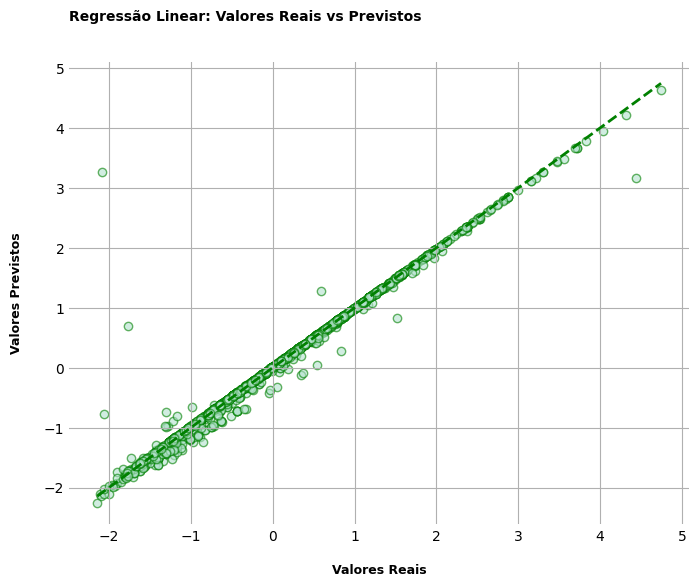

In [35]:
# Valores previstos
y_pred = modelo.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--g', lw=2)

plt.title('Regressão Linear: Valores Reais vs Previstos', fontsize=10, fontweight='bold', loc='left',pad=30)
plt.xlabel('Valores Reais', fontsize=9, fontweight='semibold', labelpad=15)
plt.ylabel('Valores Previstos', fontsize=9, fontweight='semibold', labelpad=15)
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

**Distribuição dos pontos**

- Se os pontos estão concentrados em torno da linha verde tracejada, significa que o modelo consegue prever salários com alta precisão.

- Isso mostra que ele aprendeu bem a relação entre as variáveis e o salário.

- Erros visuais

- Quando os pontos estão mais distantes da linha, é onde o modelo errou mais.

**Gráfico de distribuição dos resíduos**

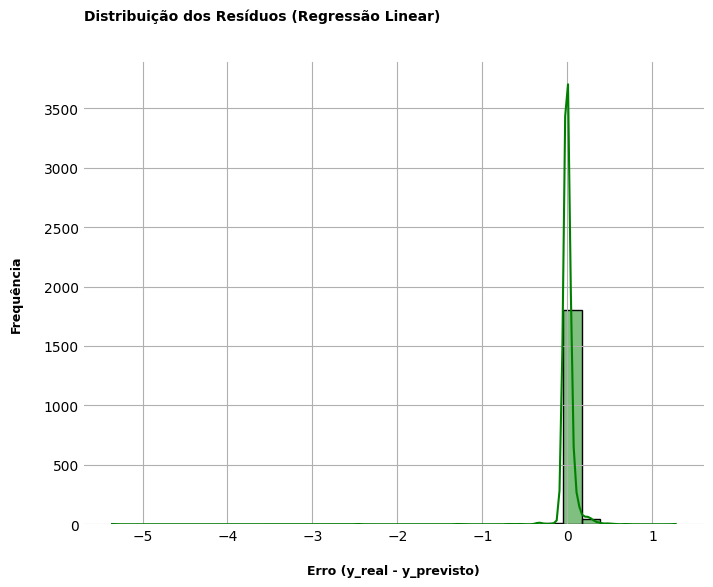

In [38]:
residuos = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True, bins=30, color='green')

plt.title('Distribuição dos Resíduos (Regressão Linear)', fontsize=10, fontweight='bold', loc='left',pad=30)
plt.xlabel('Erro (y_real - y_previsto)', fontsize=9, fontweight='semibold', labelpad=15)
plt.ylabel('Frequência', fontsize=9, fontweight='semibold', labelpad=15)
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

**O que observar nesse gráfico:**

- Centralização em torno de zero

- Se a maior parte dos resíduos está perto de 0, significa que o modelo não tem viés: ele não está superestimando nem subestimando os salários de forma sistemática.

- Esse é um bom sinal de que as previsões estão equilibradas.

- Simetria da distribuição

- Uma distribuição simétrica (parecida com uma curva normal em torno de 0) indica que os erros são distribuídos de forma aleatória.

- Isso mostra que o modelo não deixou nenhuma “padrão escondido” sem aprender.

- Caudas (valores extremos)

- Se aparecem resíduos muito grandes (caudas longas), significa que o modelo tem dificuldade em prever bem alguns casos específicos (ex.: salários muito altos ou muito baixos).

- Isso é esperado em dados reais, mas se for frequente, pode indicar necessidade de ajuste.

**Gráfico de Resíduos vs Previsões**

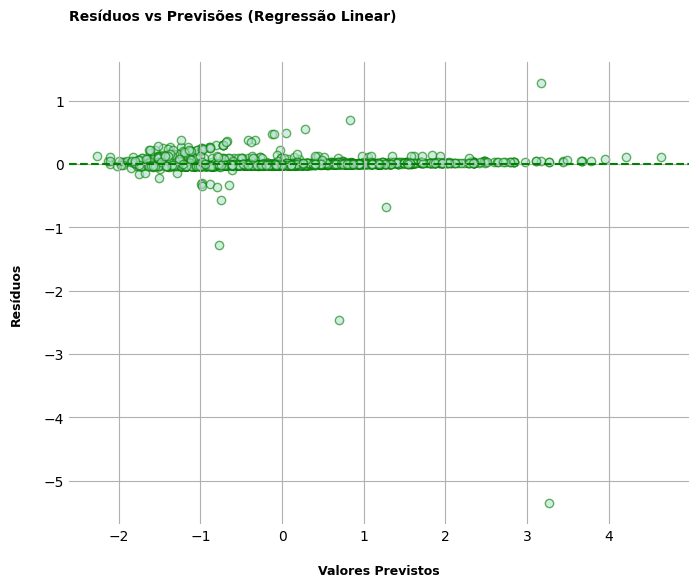

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuos, alpha=0.6, edgecolor='g')
plt.axhline(y=0, color='green', linestyle='--')

plt.title('Resíduos vs Previsões (Regressão Linear)', fontsize=10, fontweight='bold', loc='left', pad=30)
plt.xlabel('Valores Previstos', fontsize=9, fontweight='semibold', labelpad=15)
plt.ylabel('Resíduos', fontsize=9, fontweight='semibold', labelpad=15)
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

Nesse gráfico, no eixo x temos os valores previstos pelo modelo e no eixo y temos os resíduos (erro entre valor real e previsto).

**O que observar nesse gráfico:**

- Padrão dos pontos

- O ideal é que os pontos fiquem espalhados de forma aleatória em torno da linha horizontal no zero.

- Isso significa que os erros não seguem nenhum padrão → o modelo está capturando bem a relação entre variáveis e salário.

- Linha no zero (y=0)

- Essa linha serve como referência. Quanto mais os resíduos estiverem próximos dela, melhor o modelo.

**Problemas comuns que podem aparecer:**

- Tendência em forma de U ou curva → indica que o modelo linear não está conseguindo capturar relações mais complexas (talvez outro modelo como Random Forest fosse melhor).

- Cone (heterocedasticidade) → se os resíduos aumentam à medida que os valores previstos aumentam, significa que o erro cresce para salários mais altos → o modelo pode estar menos confiável nesses casos.

- Agrupamentos claros → sugerem que o modelo deixou algum padrão não aprendido.

## 📌 **Conclusão**

A análise exploratória mostrou que fatores como **nível de experiência**, **tipo de contrato**, **tamanho da empresa** e **modelo de trabalho (remoto ou presencial)** exercem impacto relevante na variação salarial de profissionais da área de dados.

Após o pré-processamento e a preparação do dataset, aplicamos um modelo de **Regressão Linear** para prever salários. Os resultados foram bastante satisfatórios:

- **MAE (Erro Absoluto Médio):** 0.03  
- **RMSE (Raiz do Erro Quadrático Médio):** 0.16  
- **R² (Coeficiente de Determinação):** 0.9767  

Esses valores indicam que o modelo consegue prever salários com **alta precisão**, explicando cerca de **97% da variabilidade dos dados**.  

Além disso, a análise dos coeficientes mostrou que variáveis como **work_setting (modelo de trabalho)**, **employment_type (tipo de contrato)** e **nível de experiência** são os principais fatores associados às diferenças salariais.  

---

✅ **Em resumo**: este projeto demonstra a aplicação prática de todo o fluxo de um projeto de Data Science — desde a exploração dos dados até a modelagem e avaliação — com resultados robustos e insights relevantes para o mercado de trabalho em dados.